In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import csv
import datetime
from pandas.tools.plotting import scatter_matrix
from pandas.tools.plotting import radviz

results = pd.read_csv('results.csv')
results['Pace'] = pd.to_datetime(results['Pace'], format='%M:%S')
results['Chip Time'] = pd.to_datetime(results['Chip Time'], format='%M:%S.%f')
results['Age'] = pd.to_numeric(results['Age'],errors='coerce')
results = pd.DataFrame.dropna(results)
results.Age = results.Age.astype(int)
results.City = results.City.astype(str)
results.ST = results.ST.astype(str)
results['AG Rank'] = pd.to_numeric(results['AG Rank'],errors='coerce')

In [2]:
fiveK = results[results.Race == '5K']
tenK = results[results.Race == '10K']

In [3]:
results.head()

Bib First Name  Last Name Race  Race Rank Gender  Gen Rank  Age Age Group  \
0  1255        SAM    SEEKINS   5K          1      M         1   24     20-24   
1  1278       MATT      SHOCK   5K          2      M         2   34     30-34   
2  1644   JONATHAN     KINSEY   5K          3      M         3   31     30-34   
3  1353   ORINTHAL  STRIGGLES   5K          4      M         4   40     40-44   
4  1497   SHAWANNA      WHITE   5K          5      F         1   36     35-39   

   AG Rank        City  ST               Chip Time                Pace  
0        1    COLUMBIA  SC 1900-01-01 00:15:43.100 1900-01-01 00:05:03  
1        1  GREENVILLE  SC 1900-01-01 00:16:12.700 1900-01-01 00:05:13  
2        2    COLUMBIA  SC 1900-01-01 00:16:28.500 1900-01-01 00:05:18  
3        1    COLUMBIA  SC 1900-01-01 00:18:23.800 1900-01-01 00:05:55  
4        1    COLUMBIA  SC 1900-01-01 00:18:24.400 1900-01-01 00:05:55

In [4]:
results.dtypes

Bib                    int64
First Name            object
Last Name             object
Race                  object
Race Rank              int64
Gender                object
Gen Rank               int64
Age                    int64
Age Group             object
AG Rank                int64
City                  object
ST                    object
Chip Time     datetime64[ns]
Pace          datetime64[ns]
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x107c65610>]], dtype=object)

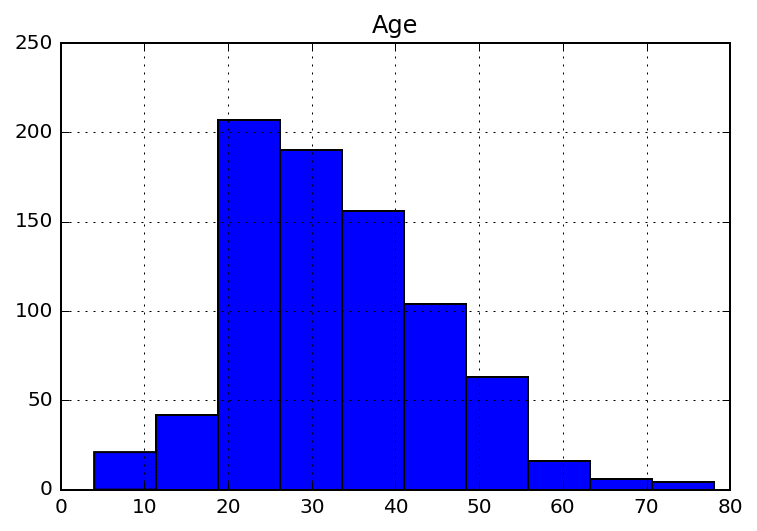

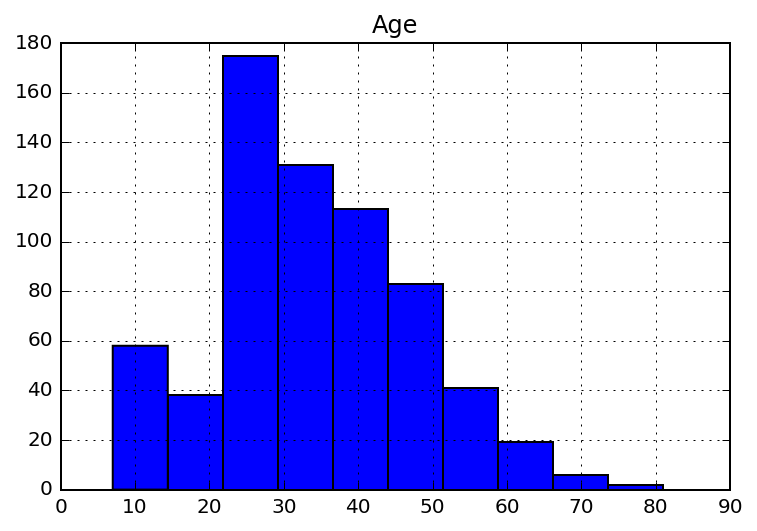

In [5]:
fiveK[fiveK['Gender'] == 'F'].hist('Age')
fiveK[fiveK['Gender'] == 'M'].hist('Age')

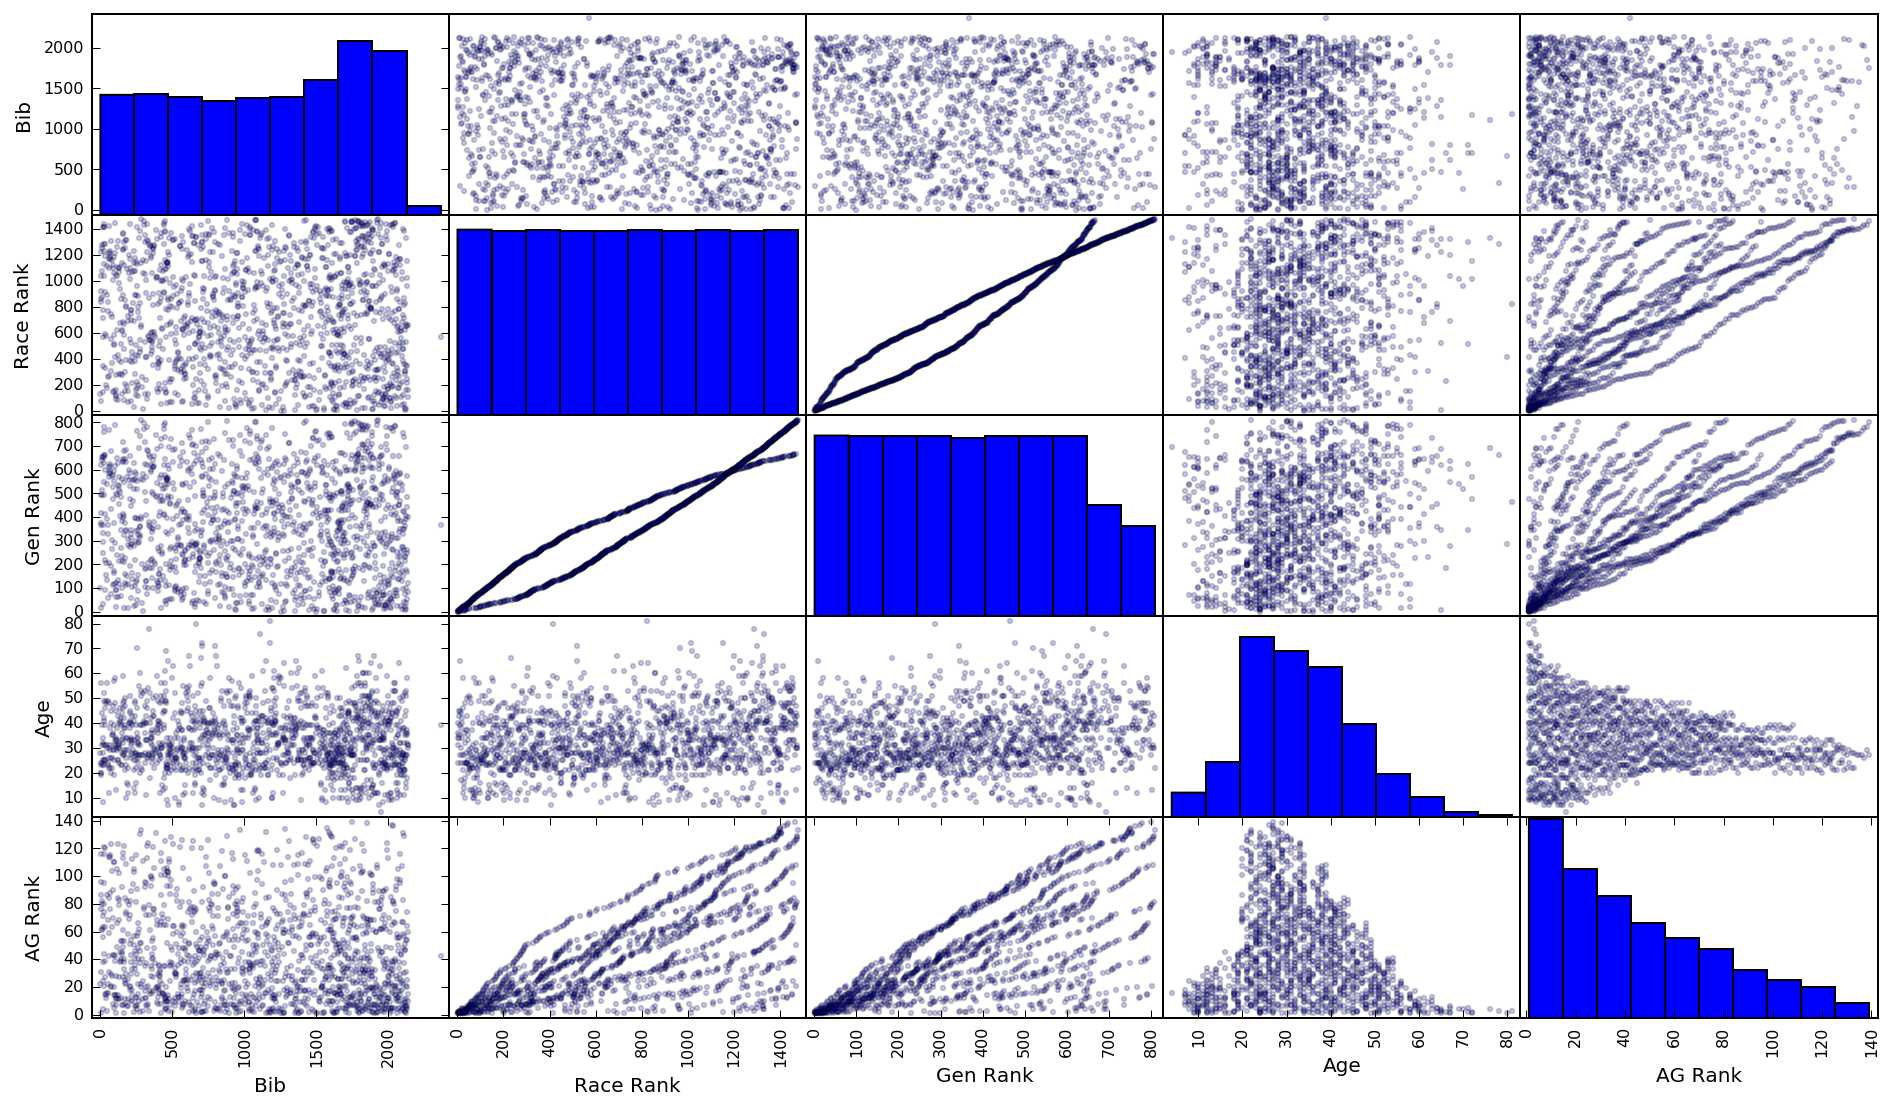

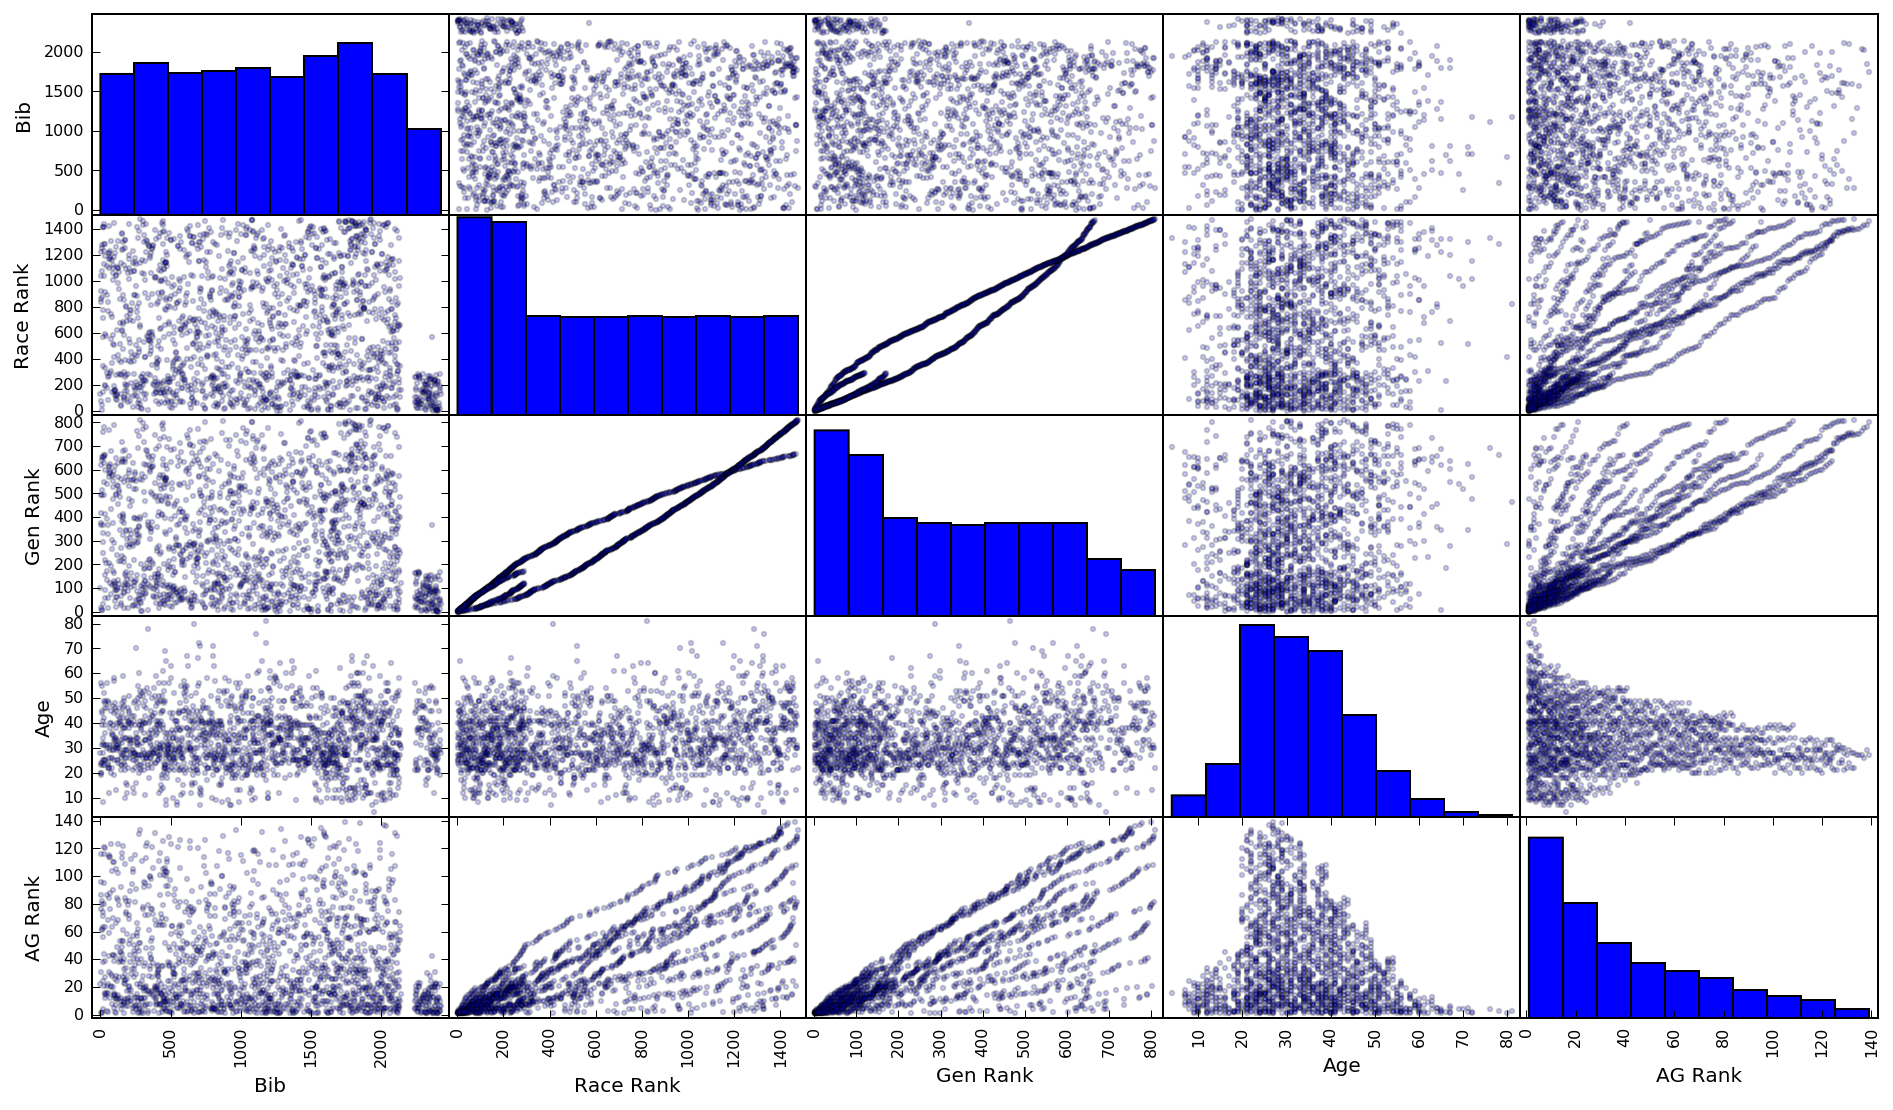

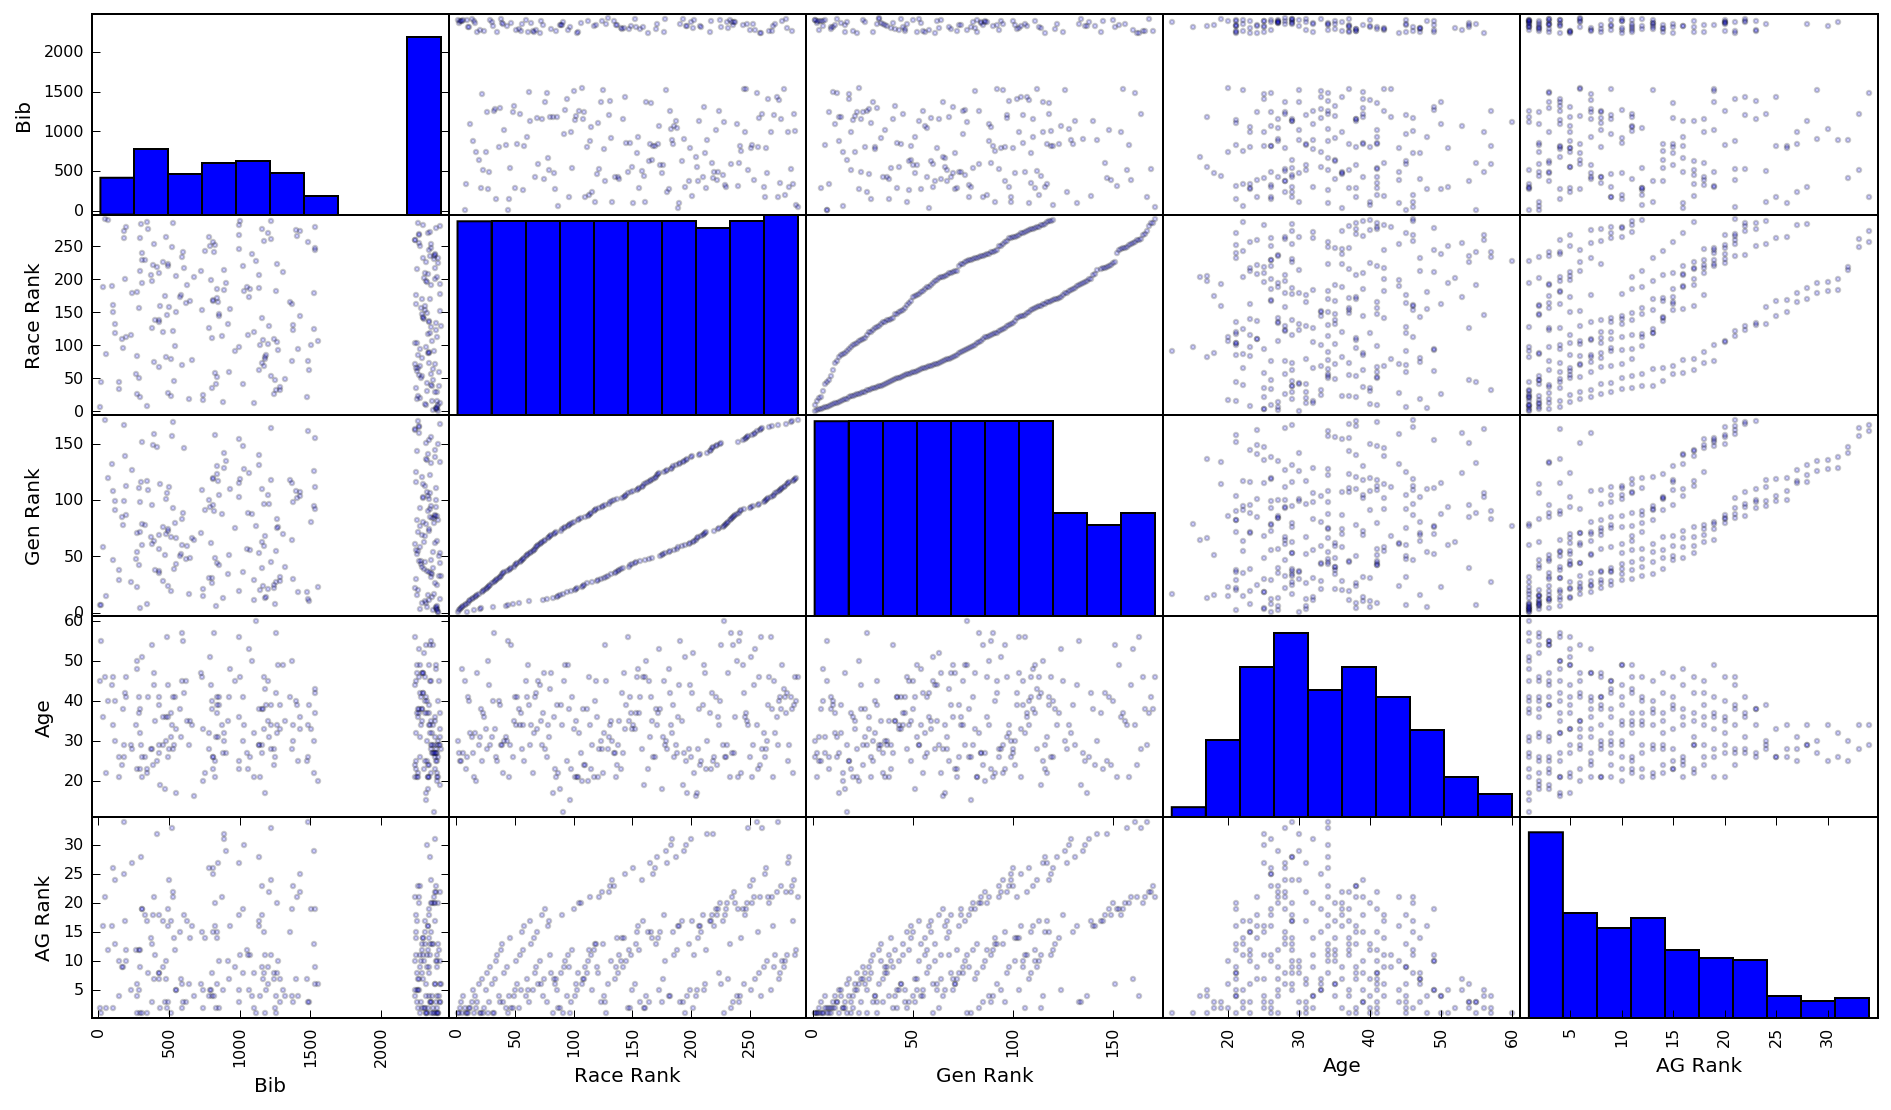

In [6]:
ax = scatter_matrix(fiveK, alpha=0.2, figsize=(16, 9))
ax = scatter_matrix(results, alpha=0.2, figsize=(16, 9))
ax = scatter_matrix(tenK, alpha=0.2, figsize=(16, 9))

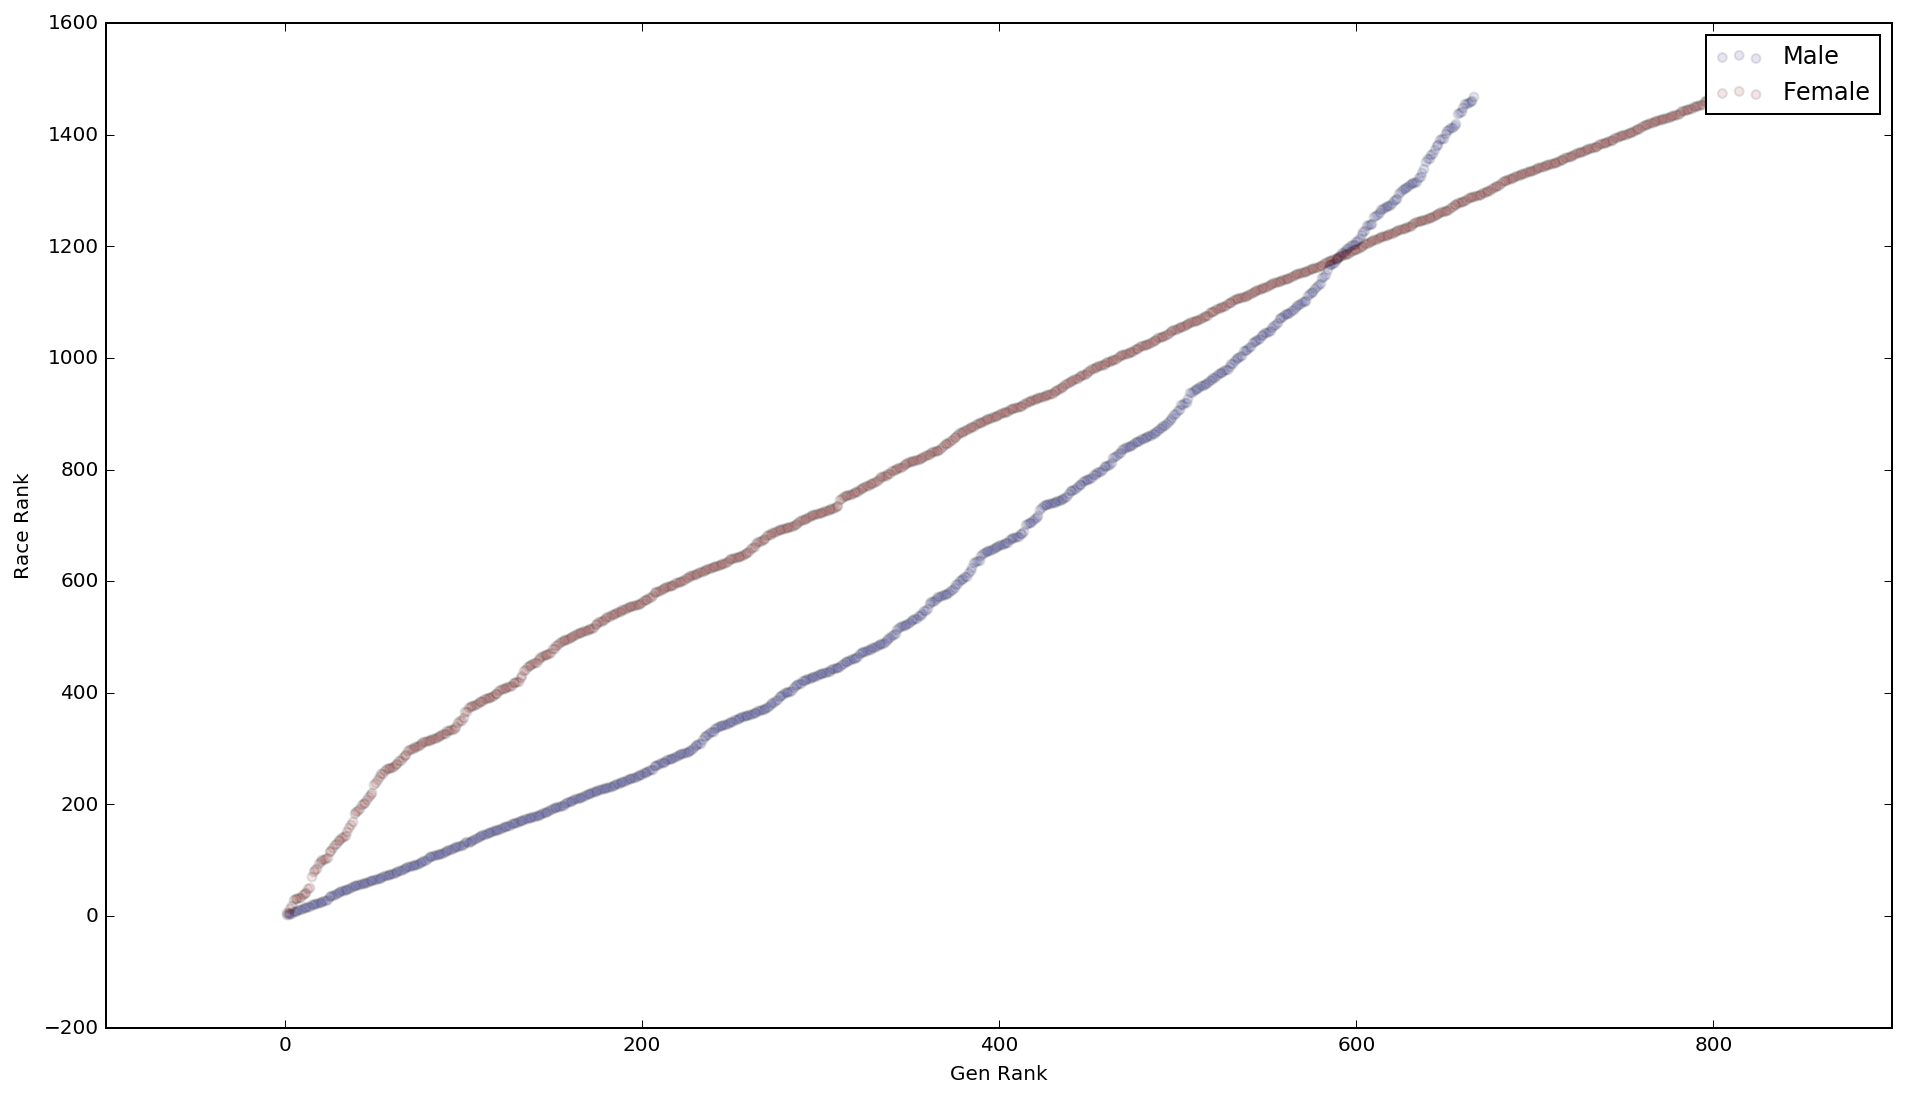

In [7]:
ax = fiveK[fiveK['Gender'] == 'M'].plot.scatter(
    x='Gen Rank', y='Race Rank', color='DarkBlue', label='Male',figsize=(16,9),alpha=0.1)
fiveK[fiveK['Gender'] == 'F'].plot.scatter(
    x='Gen Rank', y='Race Rank', color='DarkRed', label='Female',ax=ax,alpha=0.1)

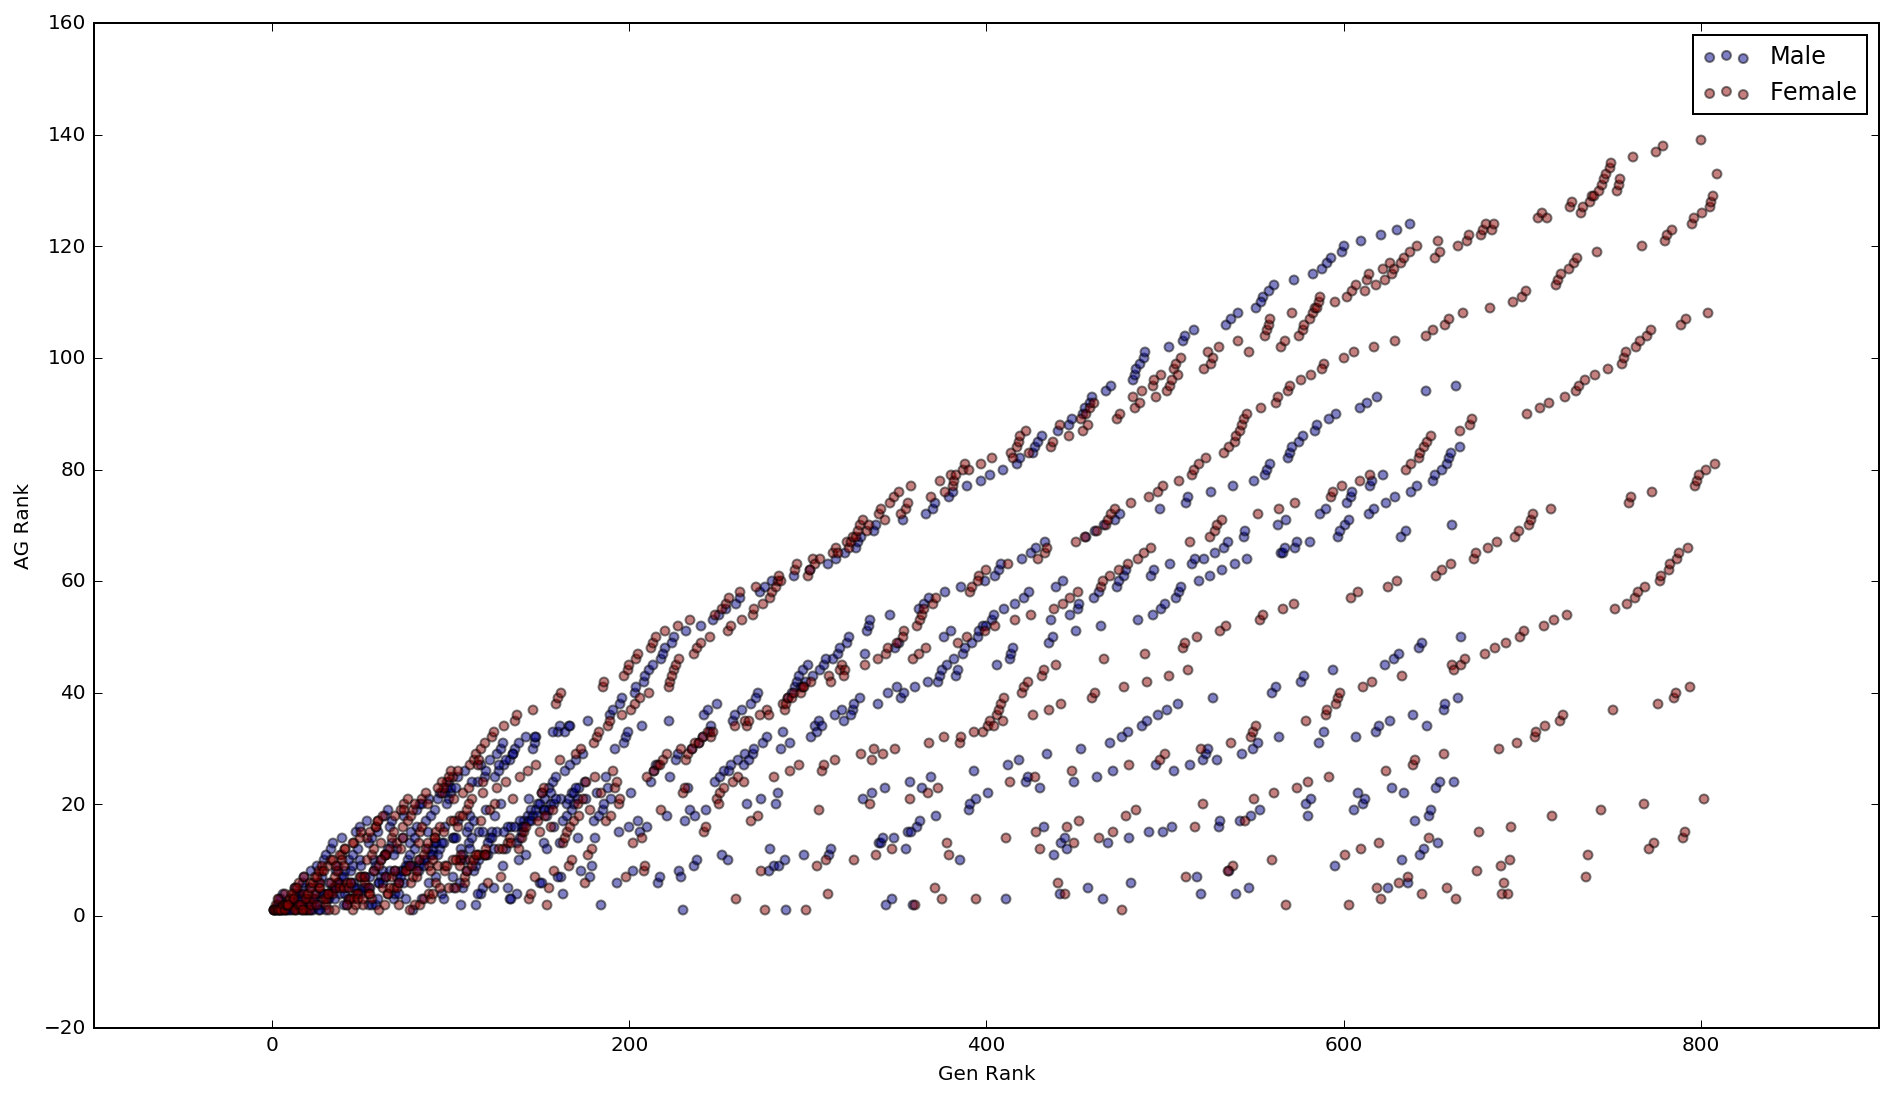

In [8]:
ax = results[results['Gender'] == 'M'].plot.scatter(
    x='Gen Rank', y='AG Rank', color='DarkBlue', label='Male',figsize=(16,9),alpha=0.5)
results[results['Gender'] == 'F'].plot.scatter(
    x='Gen Rank', y='AG Rank', color='DarkRed', label='Female',ax=ax,alpha=0.5)

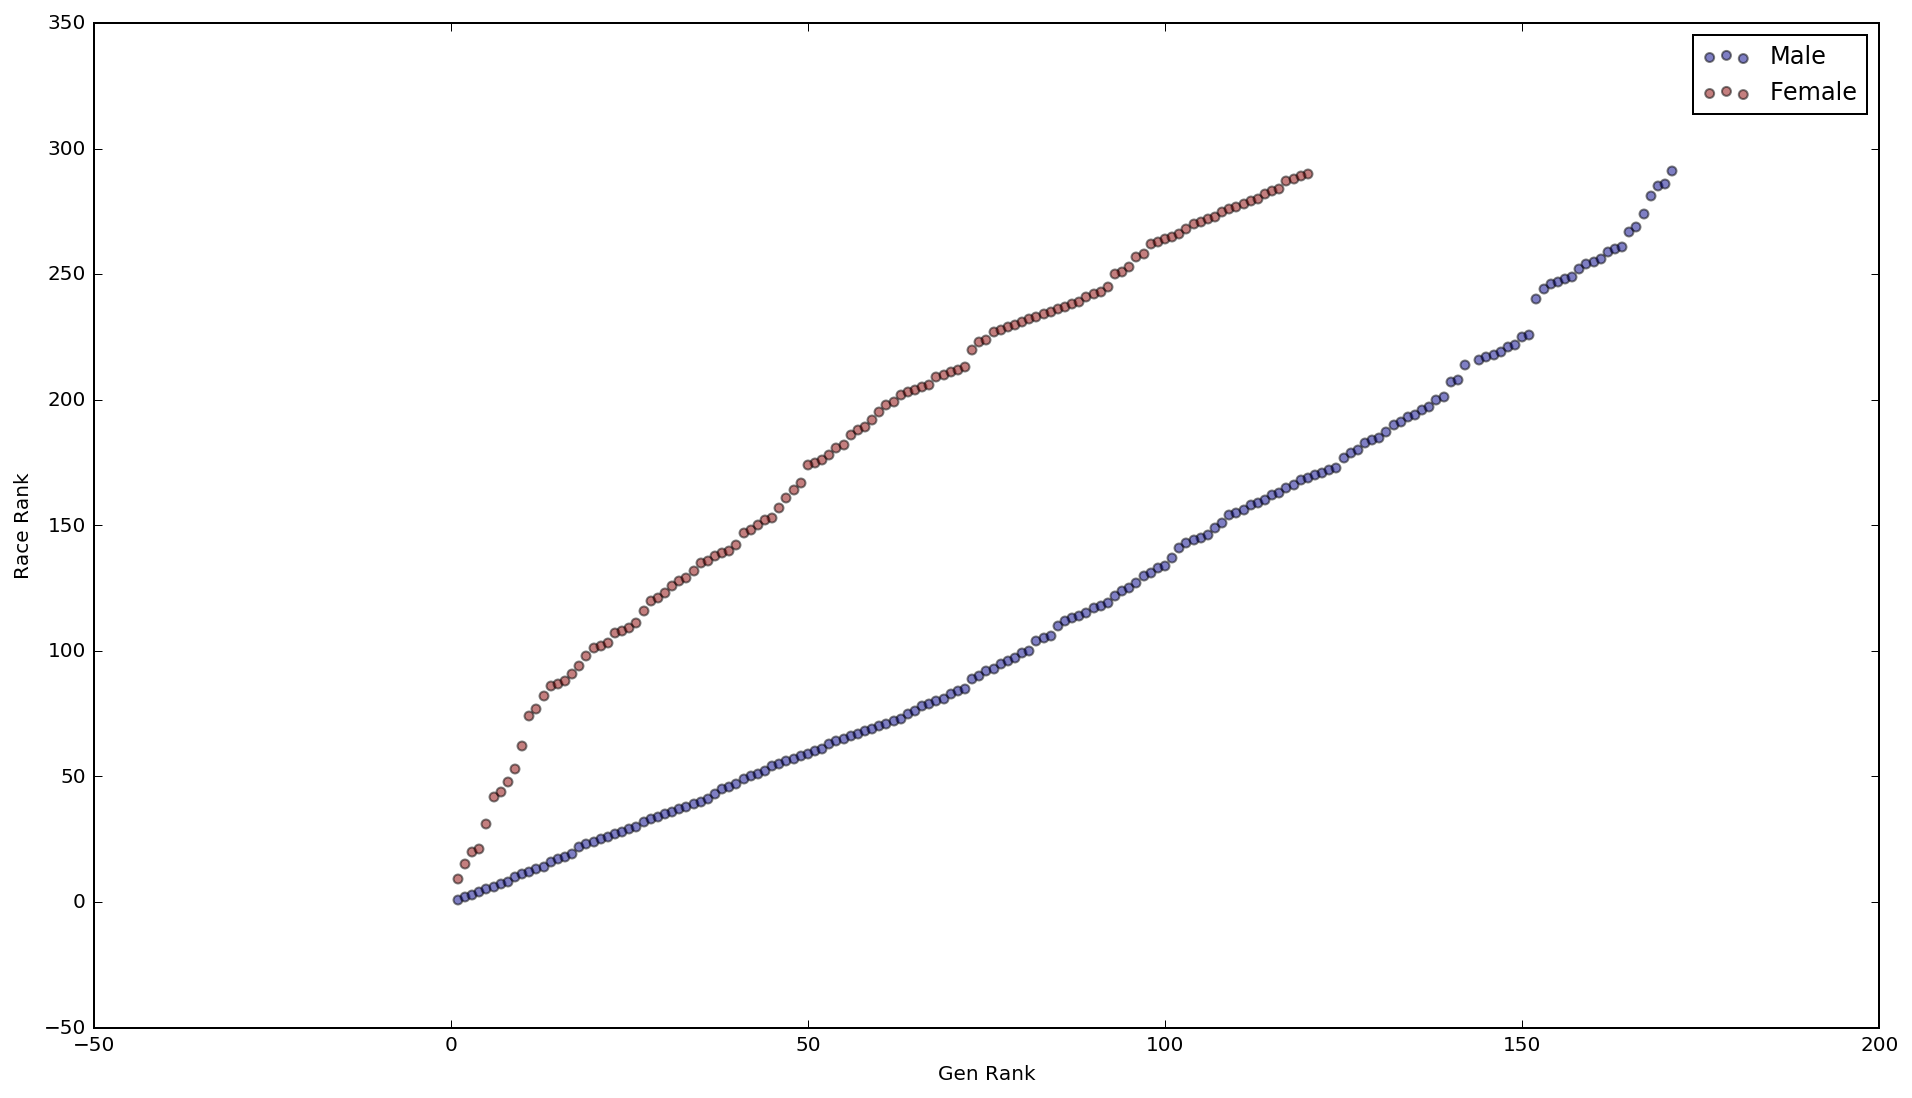

In [9]:
ax = tenK[tenK['Gender'] == 'M'].plot.scatter(
    x='Gen Rank', y='Race Rank', color='DarkBlue', label='Male',figsize=(16,9),alpha=0.5)
tenK[tenK['Gender'] == 'F'].plot.scatter(
    x='Gen Rank', y='Race Rank', color='DarkRed', label='Female',ax=ax,alpha=0.5)

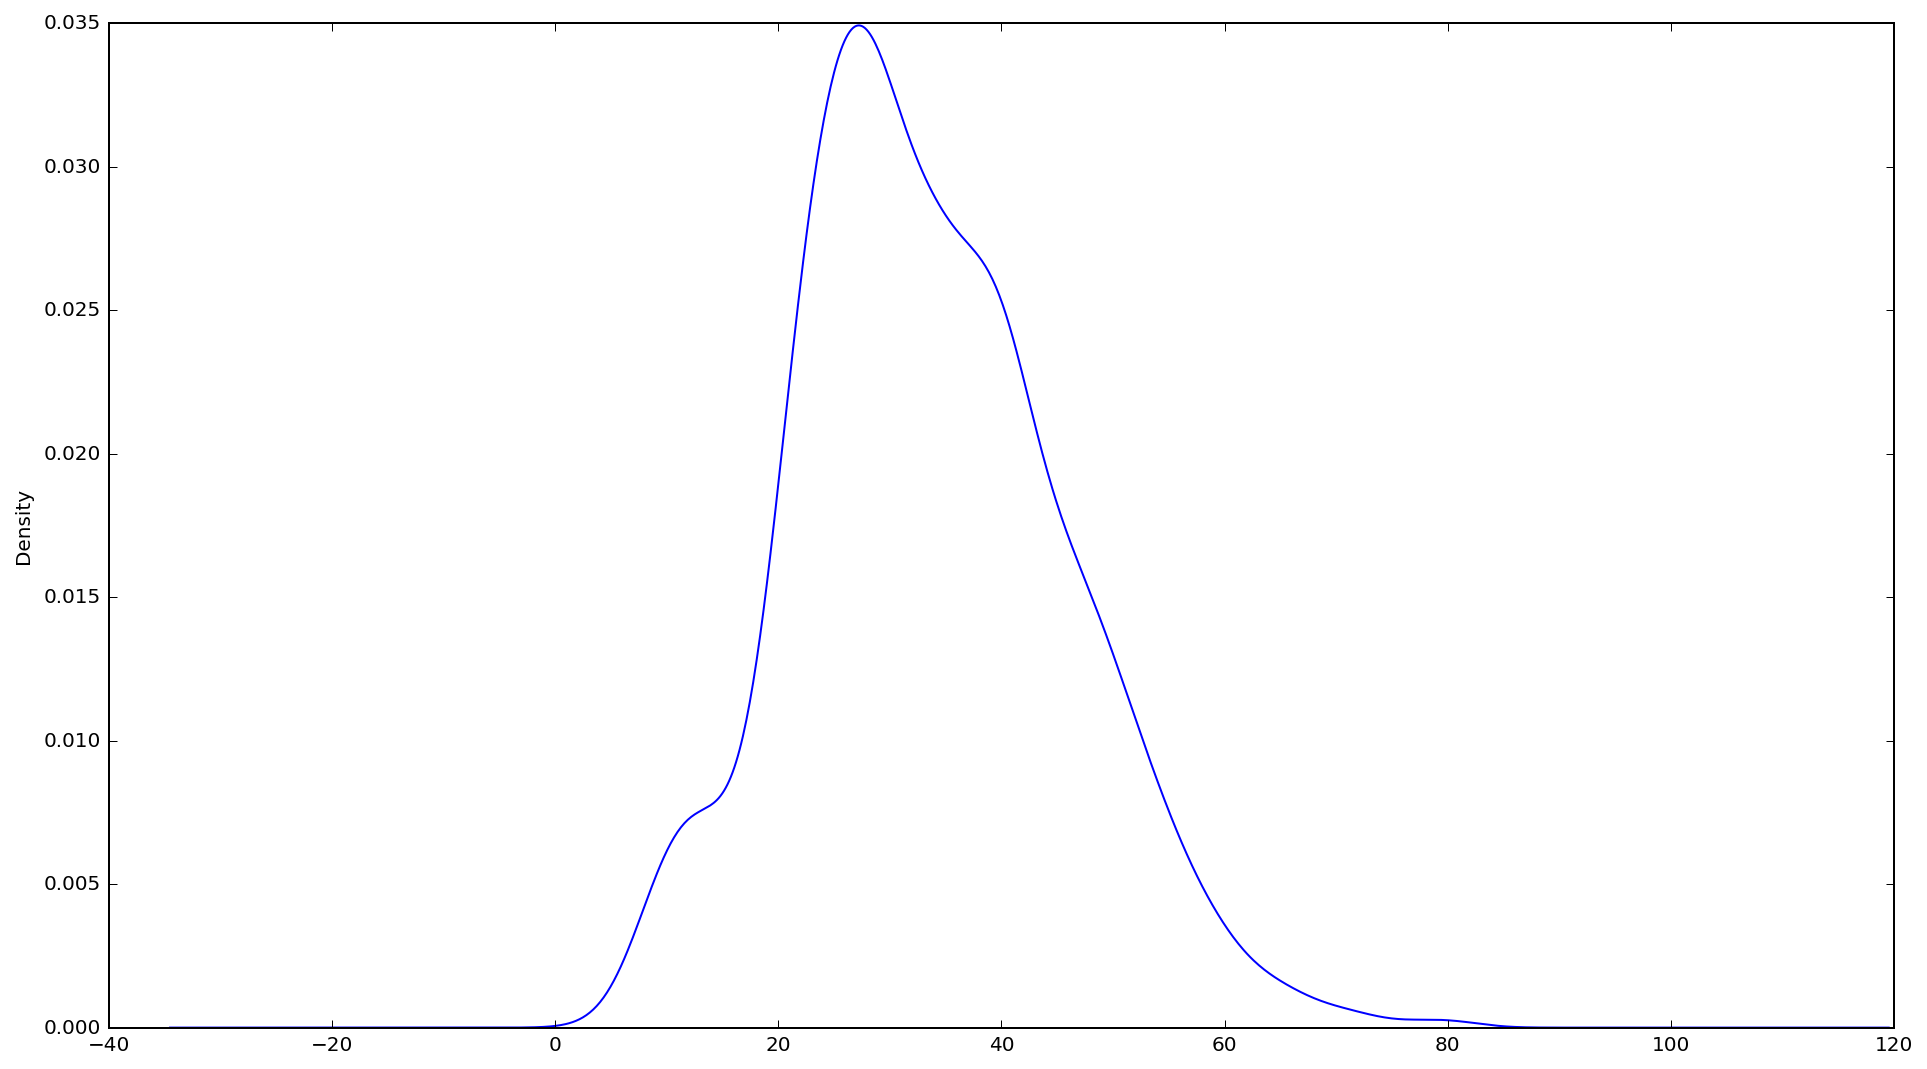

In [10]:
ax = results['Age'].plot.kde(figsize=(16,9))

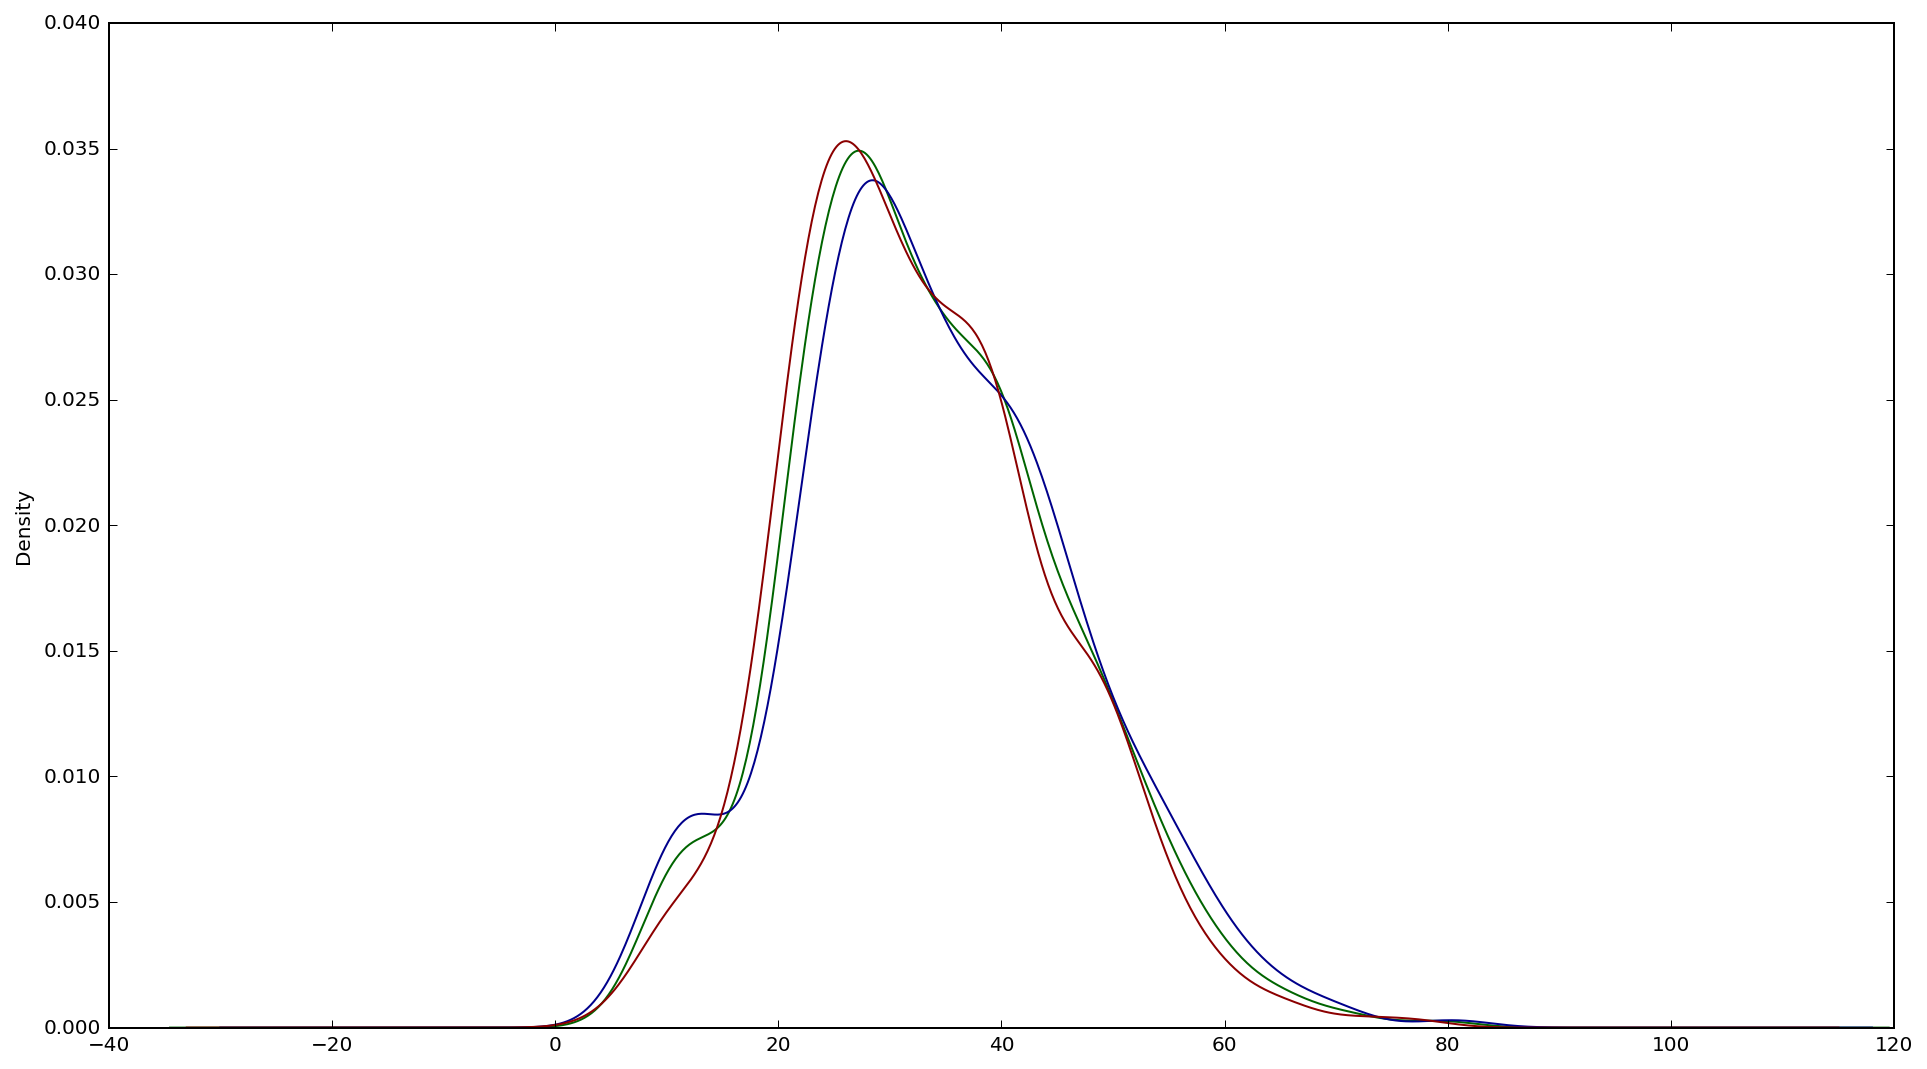

In [11]:
ax = results['Age'].plot.kde(figsize=(16,9), color='DarkGreen')
ax = results[results['Gender'] == 'M']['Age'].plot.kde(figsize=(16,9), color='DarkBlue', label='Male',ax=ax)
ax = results[results['Gender'] == 'F']['Age'].plot.kde(figsize=(16,9), color='DarkRed', label='Female',ax=ax)

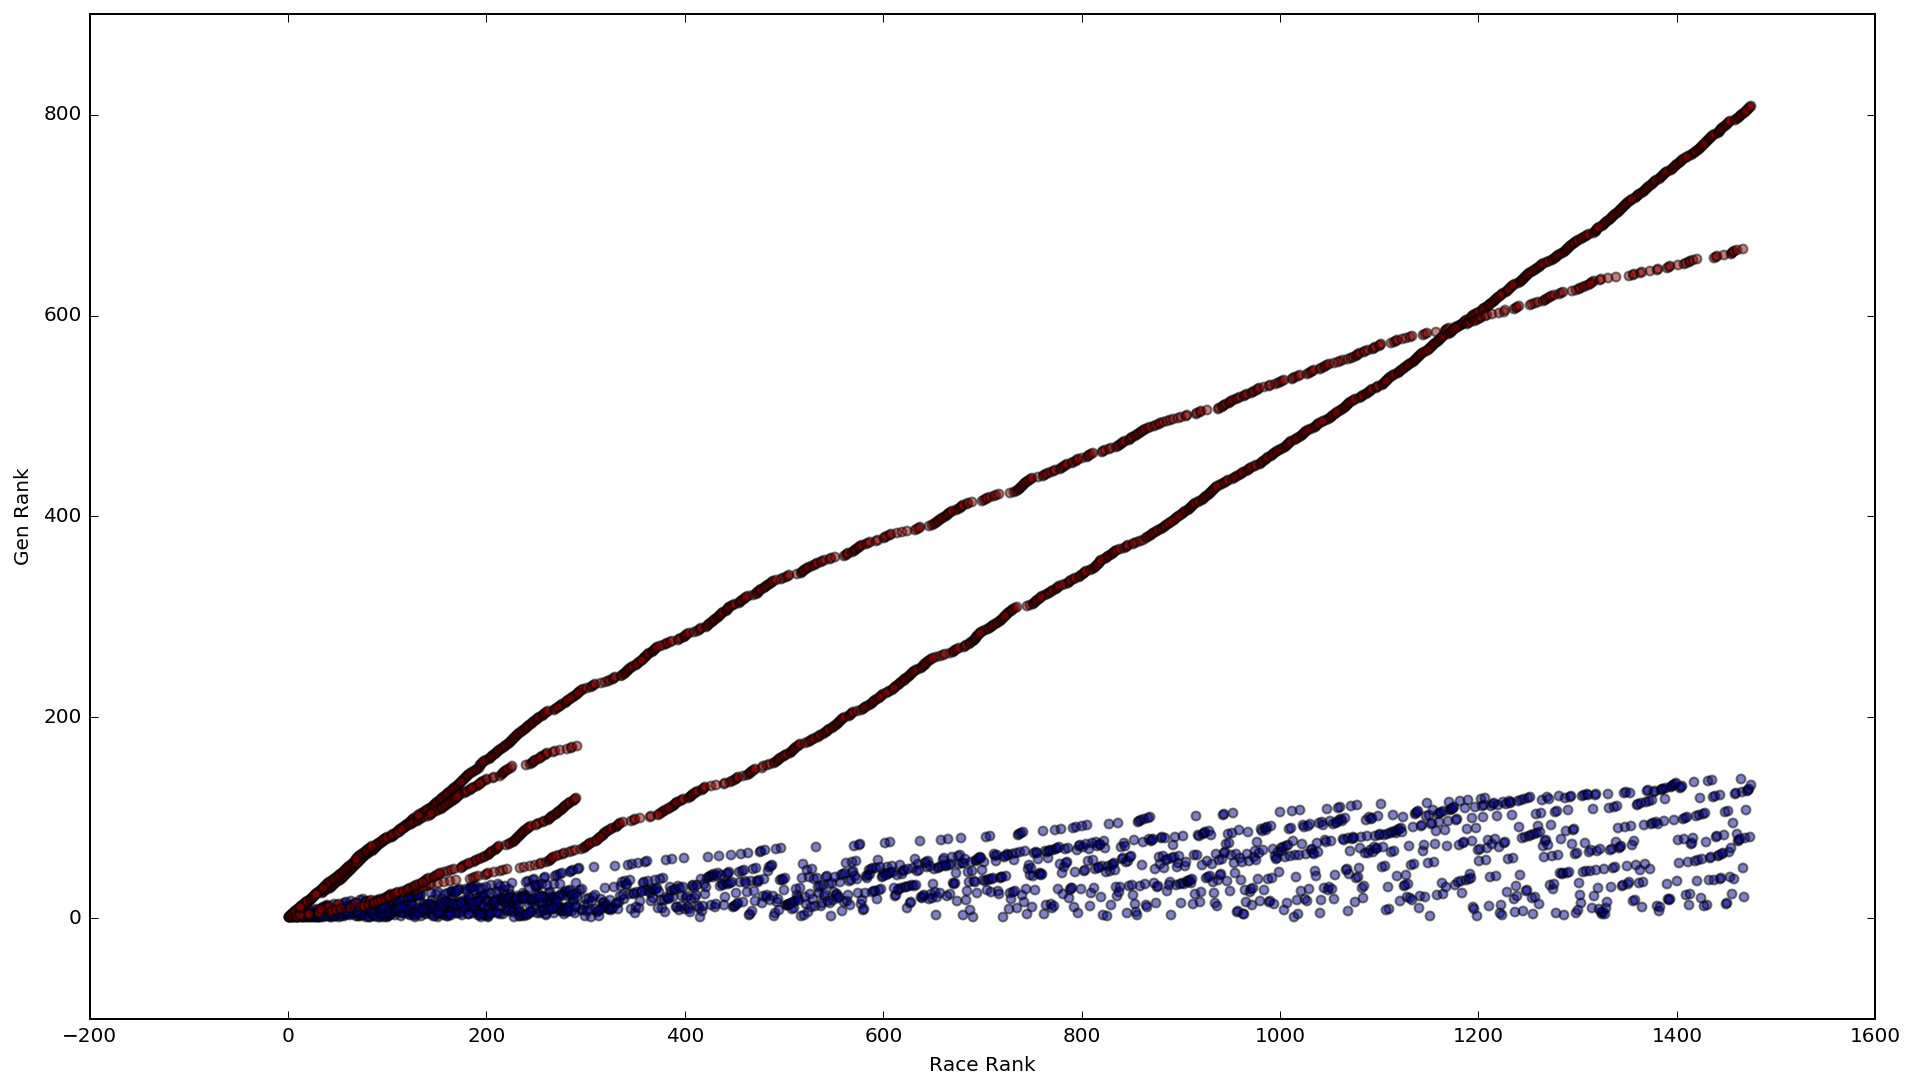

In [12]:
ax = results.plot.scatter(x='Race Rank', y='AG Rank', color='DarkBlue',figsize=(16,9),alpha=0.5)
ax = results.plot.scatter(x='Race Rank', y='Gen Rank', color='DarkRed',figsize=(16,9),alpha=0.5,ax=ax)

In [25]:
avg = pd.pivot_table(results, index=['Pace'], columns=['Race'], values=['Age'])

KeyError: 'Pace'

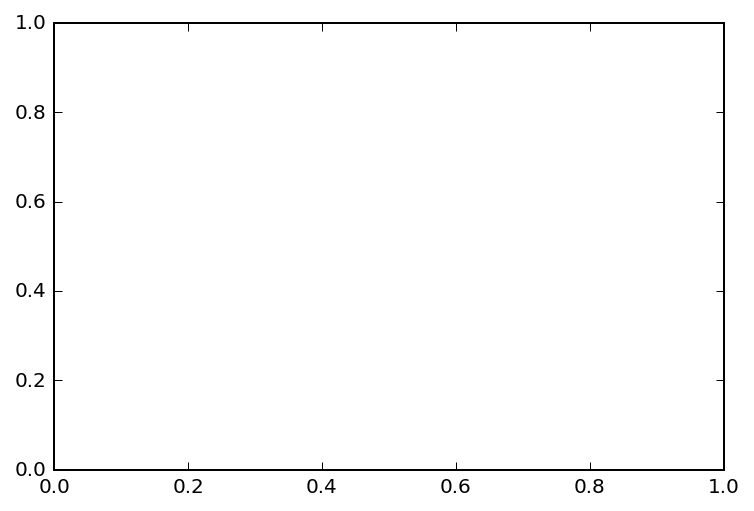

In [36]:
avg.Age.plot.scatter(x='Pace',y='Age')